In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [2]:
from keras.preprocessing.image import ImageDataGenerator
data_gen=ImageDataGenerator(rescale=1./255,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True)

In [3]:
data_path="split-garbage-dataset"

train_gen=data_gen.flow_from_directory(data_path + '/train',
                                             target_size=(224,224),
                                             batch_size=64,
                                             class_mode='categorical')
val_datagen = ImageDataGenerator(rescale = 1./255)
val_gen=val_datagen.flow_from_directory(data_path + '/valid',
                                             target_size=(224,224),
                                             batch_size=1,
                                             class_mode='categorical',
                                             shuffle=False)

Found 1768 images belonging to 6 classes.
Found 328 images belonging to 6 classes.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications.resnet_v2 import ResNet101V2, preprocess_input

model = Sequential([ResNet101V2(include_top=False,
                             weights='imagenet',
                             pooling='avg'),
                    Dense(6, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='softmax')])
model.layers[0].trainable = False

In [5]:
opt=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

In [6]:
model.compile(optimizer = opt,
              loss='squared_hinge',
              metrics=['accuracy'])



In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet101v2 (Functional)     (None, 2048)              42626560  
_________________________________________________________________
dense (Dense)                (None, 6)                 12294     
Total params: 42,638,854
Trainable params: 12,294
Non-trainable params: 42,626,560
_________________________________________________________________


In [8]:
history = model.fit(x=train_gen,validation_data=val_gen,epochs=12)

Epoch 1/12
28/28 [==============================] - 258s 9s/step - loss: 1.2486 - accuracy: 0.4938 - val_loss: 1.1298 - val_accuracy: 0.7287
Epoch 2/12
28/28 [==============================] - 324s 12s/step - loss: 1.1084 - accuracy: 0.7477 - val_loss: 1.0976 - val_accuracy: 0.7530
Epoch 3/12
28/28 [==============================] - 367s 13s/step - loss: 1.0768 - accuracy: 0.7924 - val_loss: 1.0761 - val_accuracy: 0.7957
Epoch 4/12
28/28 [==============================] - 362s 13s/step - loss: 1.0532 - accuracy: 0.8162 - val_loss: 1.0662 - val_accuracy: 0.7927
Epoch 5/12
28/28 [==============================] - 360s 13s/step - loss: 1.0394 - accuracy: 0.8281 - val_loss: 1.0454 - val_accuracy: 0.8201
Epoch 6/12
28/28 [==============================] - 361s 13s/step - loss: 1.0225 - accuracy: 0.8507 - val_loss: 1.0352 - val_accuracy: 0.8171
Epoch 7/12
28/28 [==============================] - 361s 13s/step - loss: 1.0139 - accuracy: 0.8518 - val_loss: 1.0289 - val_accuracy: 0.8262
Epoch 8

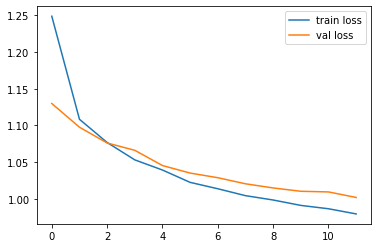

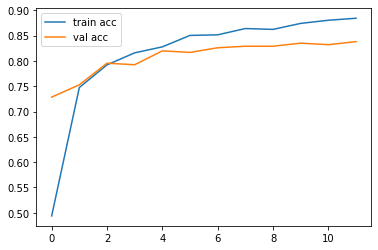

In [9]:
# plot the losses
import madtplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

In [10]:
model.save('resnet101V2.h5')

In [11]:
from tensorflow.keras.models import load_model
model=load_model('resnet101V2.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet101v2 (Functional)     (None, 2048)              42626560  
_________________________________________________________________
dense (Dense)                (None, 6)                 12294     
Total params: 42,638,854
Trainable params: 12,294
Non-trainable params: 42,626,560
_________________________________________________________________


In [12]:
data_path ="split-garbage-dataset"

test_datagen= ImageDataGenerator(rescale=1./255)

test_gen = test_datagen.flow_from_directory(data_path + '/test',
                                              target_size=(224,224),
                                              batch_size=1,
                                              class_mode='categorical',
                                              shuffle=False)

Found 431 images belonging to 6 classes.


In [13]:
y_pred = model.predict(test_gen)
y_pred = np.argmax(y_pred, axis=1)

In [14]:
from sklearn.metrics import classification_report
print(classification_report(test_gen.classes, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90        70
           1       0.82      0.91      0.87        82
           2       0.78      0.82      0.80        68
           3       0.83      0.88      0.86       108
           4       0.82      0.84      0.83        74
           5       0.79      0.38      0.51        29

    accuracy                           0.83       431
   macro avg       0.83      0.78      0.79       431
weighted avg       0.83      0.83      0.83       431



Text(0.5, 1, 'Confusion matrix of model')

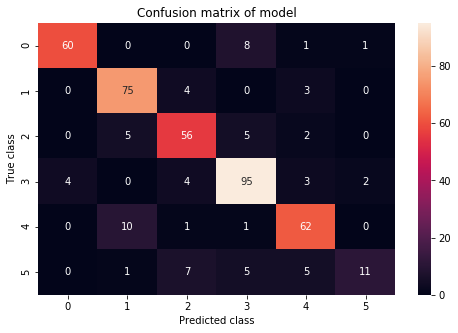

In [16]:
from sklearn.metrics import confusion_matrix,accuracy_score
cf_matrix = confusion_matrix(test_gen.classes, y_pred)
import seaborn as sns
plt.figure(figsize=(8,5))
heatmap = sns.heatmap(cf_matrix, annot=True, fmt='d', color='blue')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion matrix of model')


In [17]:
accuracy_score(test_gen.classes, y_pred)

0.8329466357308585